In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data/stud.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [11]:
print("gender unique values ", end = '')
print(df['gender'].unique())
print()
print("race_ethnicity unique values ", end = '')
print(df['race_ethnicity'].unique())
print()
print("parental_level_of_education unique values ", end = '')
print(df['parental_level_of_education'].unique())
print()
print("lunch unique values ", end = '')
print(df['lunch'].unique())
print()
print("test_preparation_course unique values ", end = '')
print(df['test_preparation_course'].unique())
print()


gender unique values ['female' 'male']

race_ethnicity unique values ['group B' 'group C' 'group A' 'group D' 'group E']

parental_level_of_education unique values ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch unique values ['standard' 'free/reduced']

test_preparation_course unique values ['none' 'completed']



In [12]:
neumeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"we have {len(neumeric_feature)} nuemeric feature , {neumeric_feature} ")
print(f"\nwe have {len(categorical_feature)} categorical feature , {categorical_feature} ")

we have 3 nuemeric feature , ['math_score', 'reading_score', 'writing_score'] 

we have 5 categorical feature , ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


In [13]:
df['total_score'] = df['reading_score'] + df['math_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
writing_full = df[df['writing_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()
math_full =  df[df['math_score'] == 100]['average'].count()

print(f"number of students full marks in math {math_full}")
print(f"number of students full marks in writing {writing_full}")
print(f"number of students full marks in reading {reading_full}")

number of students full marks in math 7
number of students full marks in writing 14
number of students full marks in reading 17


In [15]:
writing_less = df[df['writing_score'] <= 20]['average'].count()
reading_less = df[df['reading_score'] <= 20]['average'].count()
math_less =  df[df['math_score'] <= 20]['average'].count()
print(f"number of students less marks in math {math_less}")
print(f"number of students less marks in writing {writing_less}")
print(f"number of students less marks in reading {reading_less}")

number of students less marks in math 4
number of students less marks in writing 3
number of students less marks in reading 1


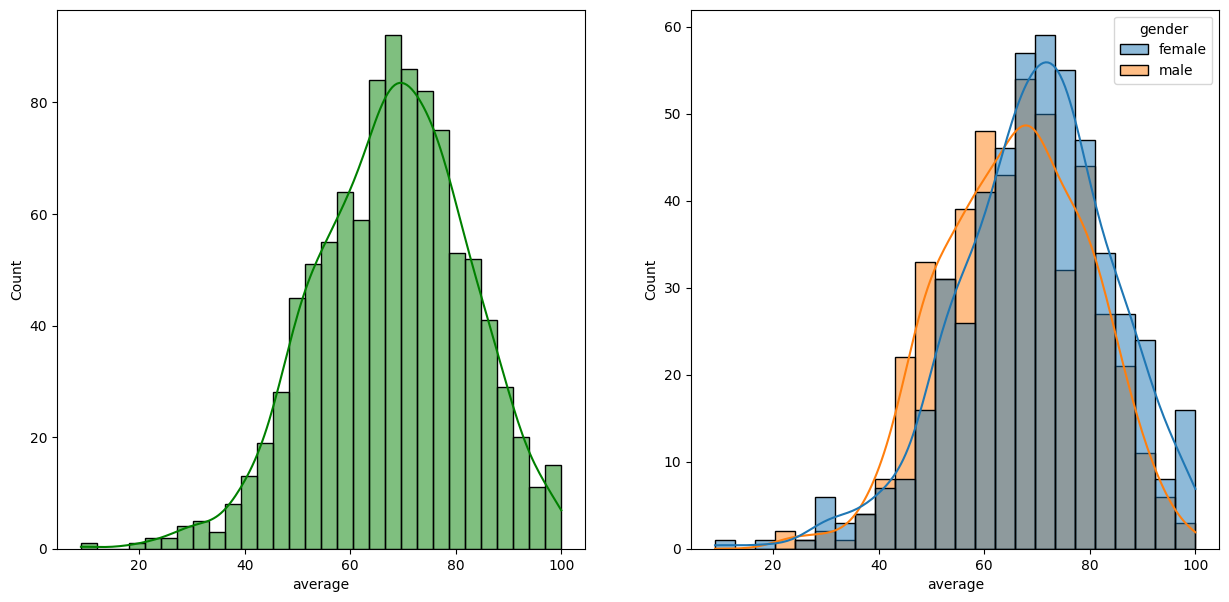

In [16]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

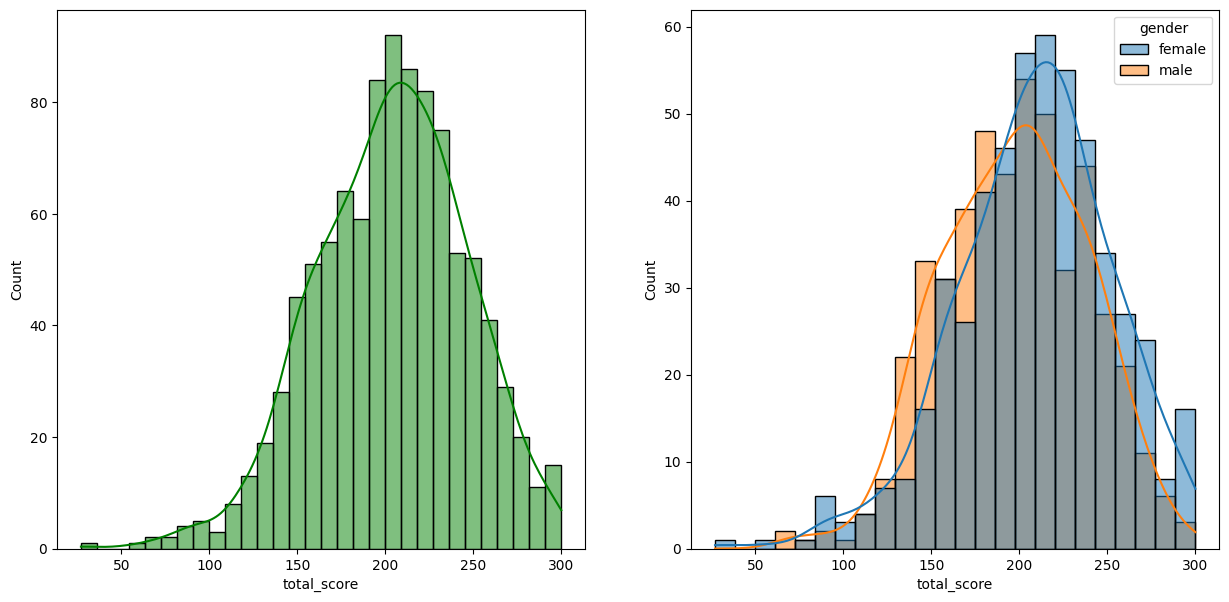

In [17]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'total_score',bins = 30,kde = True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

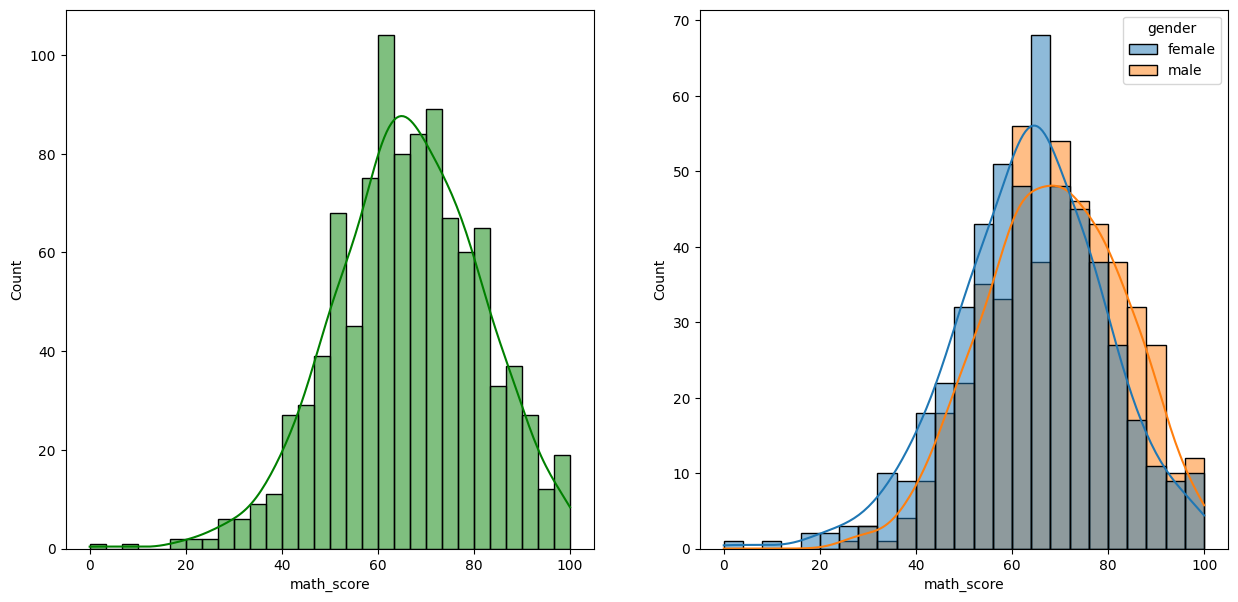

In [18]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'math_score',bins = 30,kde = True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='math_score',kde=True,hue='gender')
plt.show()

# Insights
* Female students tend to perform well then male students

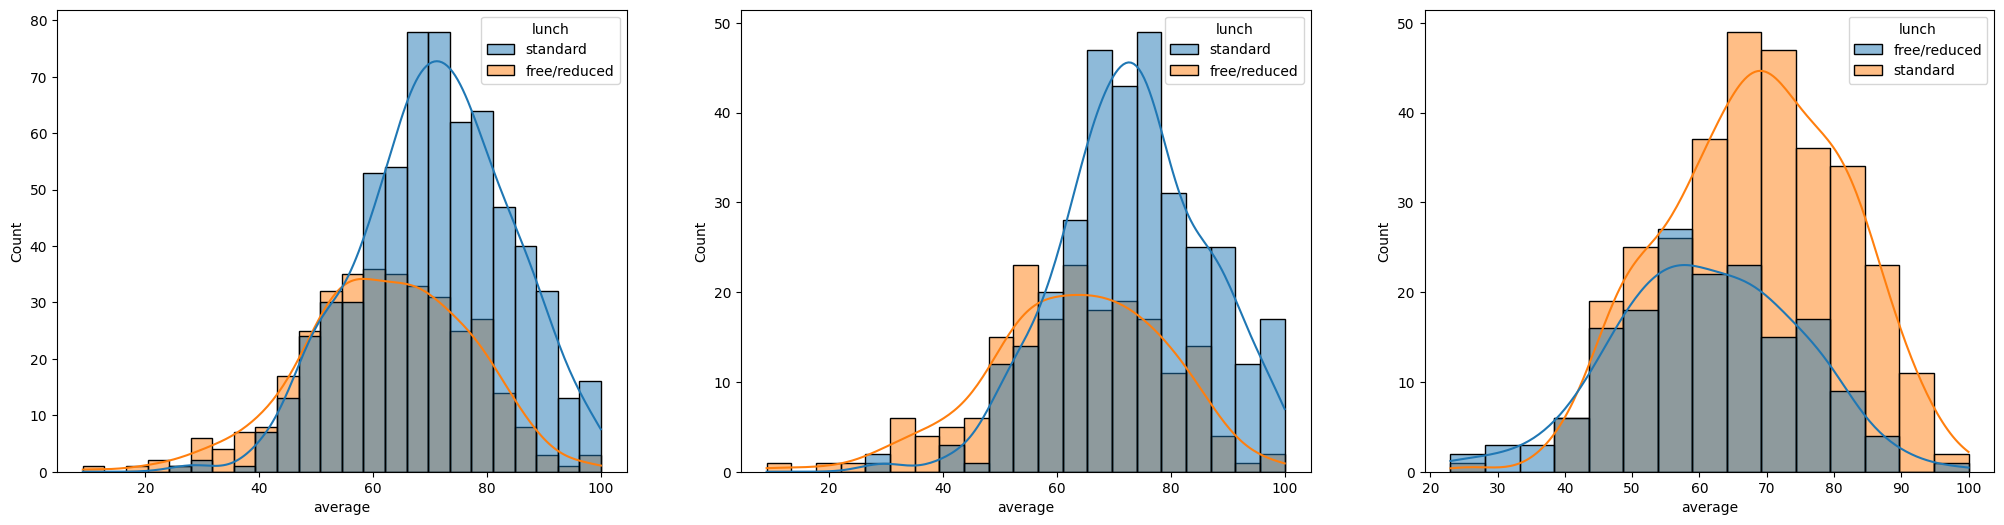

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'],x= 'average',kde = True,hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender =='male'],x='average',kde=True,hue = 'lunch')
plt.show()

# Insights
* Standard lunch helps perform well in exams 
* Standard lunch helps perfor well in exams be it a male or female 

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

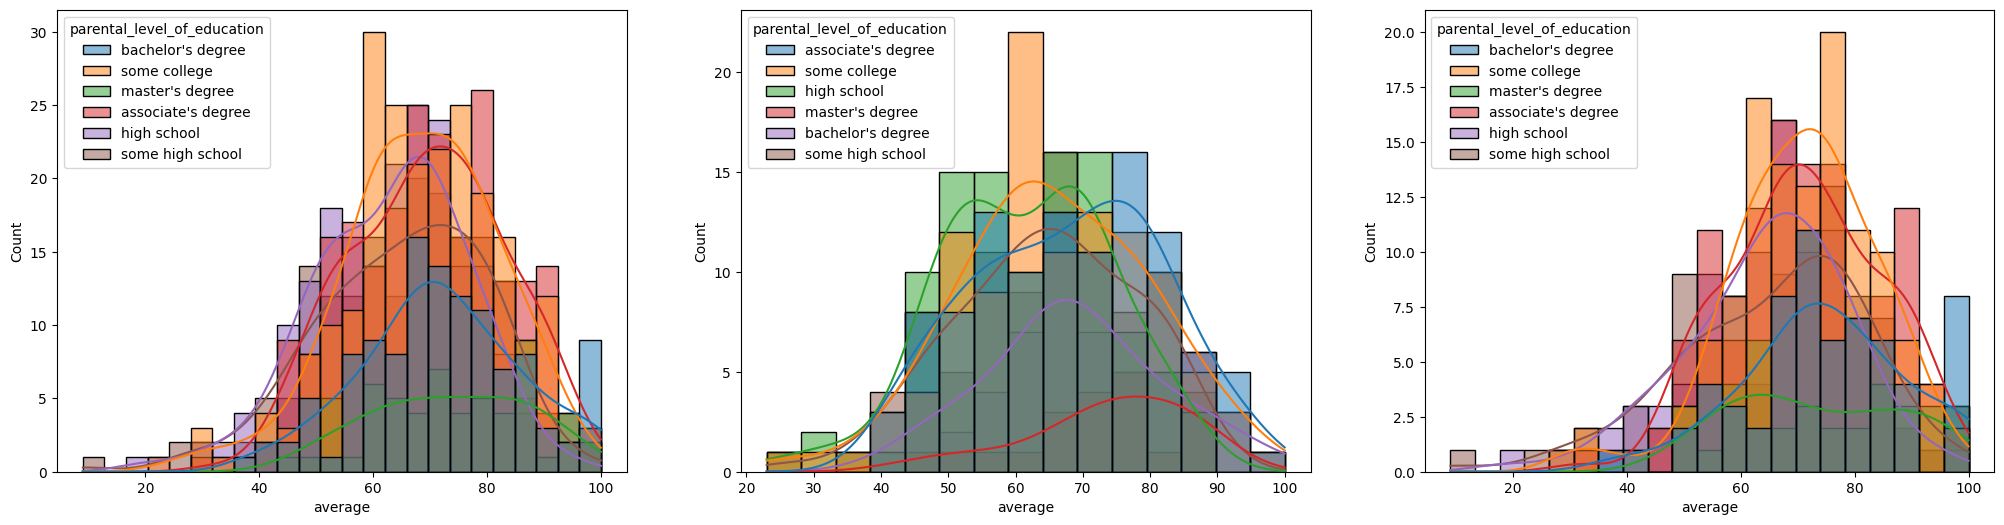

In [22]:
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df,x='average',kde = True,hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'],x='average',kde = True,hue = 'parental_level_of_education')
plt.subplot(133)
sns.histplot(data = df[df['gender']=='female'],x='average',kde =True,hue = 'parental_level_of_education')

# Insights
* In general parent's education don't help student perform well in exam 
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam 
* 3rd plot we can see there is no effect od parent's education on female students 

<Axes: xlabel='average', ylabel='Count'>

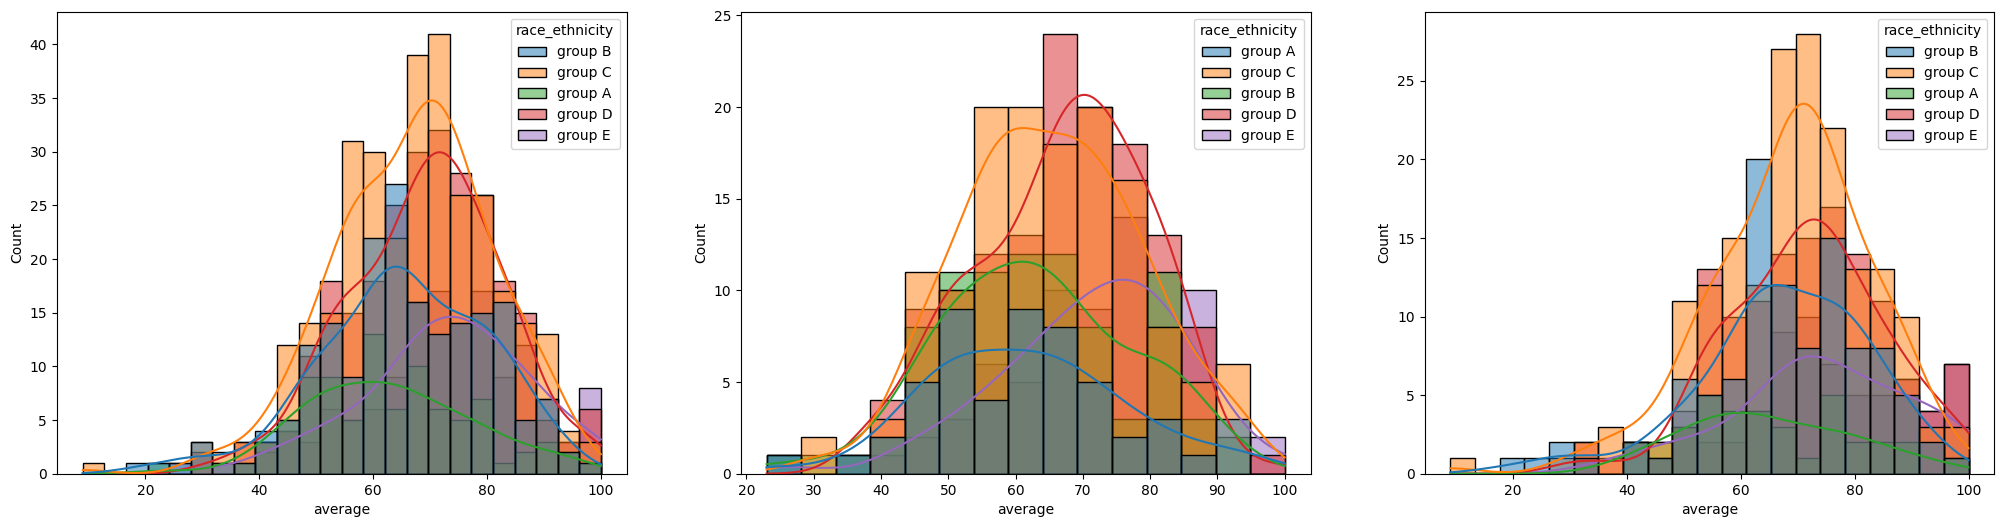

In [23]:
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df,x='average',kde = True,hue = 'race_ethnicity')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'],x='average',kde = True,hue = 'race_ethnicity')
plt.subplot(133)
sns.histplot(data = df[df['gender']=='female'],x='average',kde =True,hue = 'race_ethnicity')

# insights
* Student group of A, B and E perform very poorly in exam 
* Student group of A, B and E perform very poorly in exam irrespctively male or female


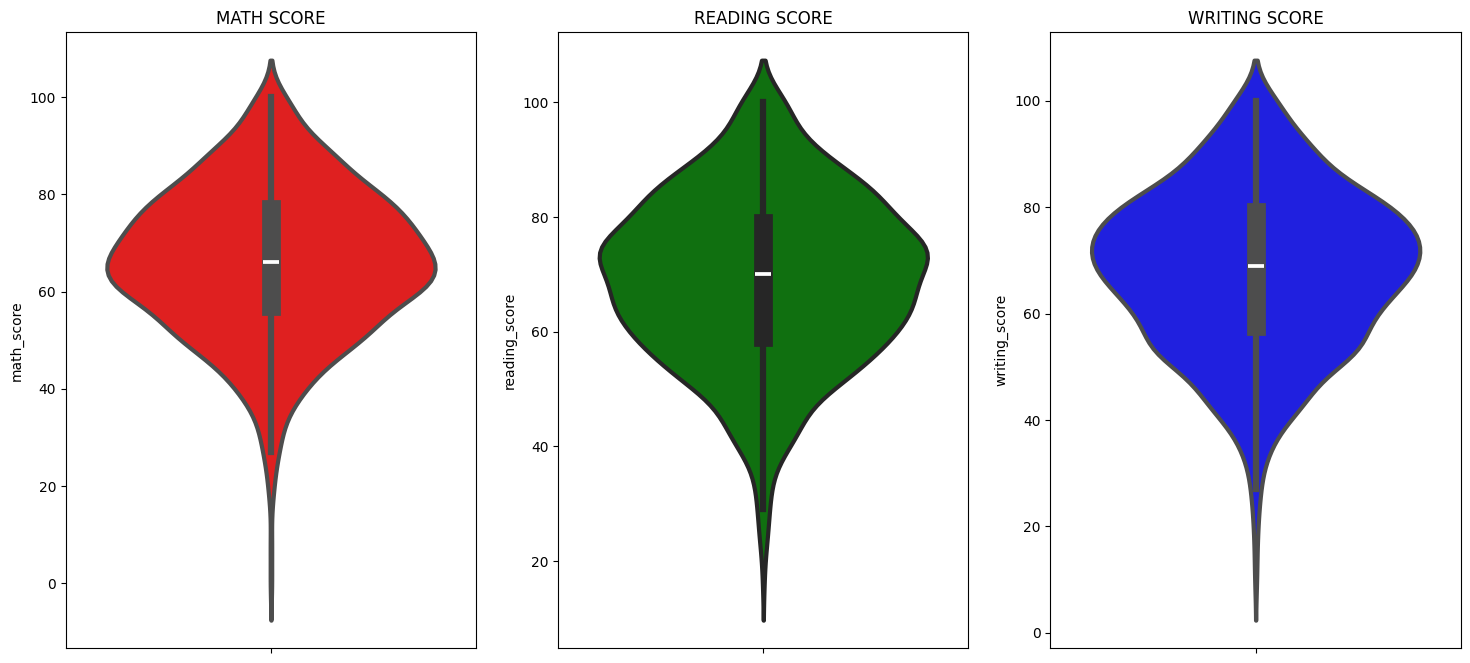

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title("MATH SCORE")
sns.violinplot(y='math_score',data=df,color= 'red',linewidth=3)
plt.subplot(132)
plt.title("READING SCORE")
sns.violinplot(y='reading_score',data = df,color = 'green',linewidth=3)
plt.subplot(133)
plt.title("WRITING SCORE")
sns.violinplot(y = 'writing_score',data = df,color='blue',linewidth=3)
plt.show()

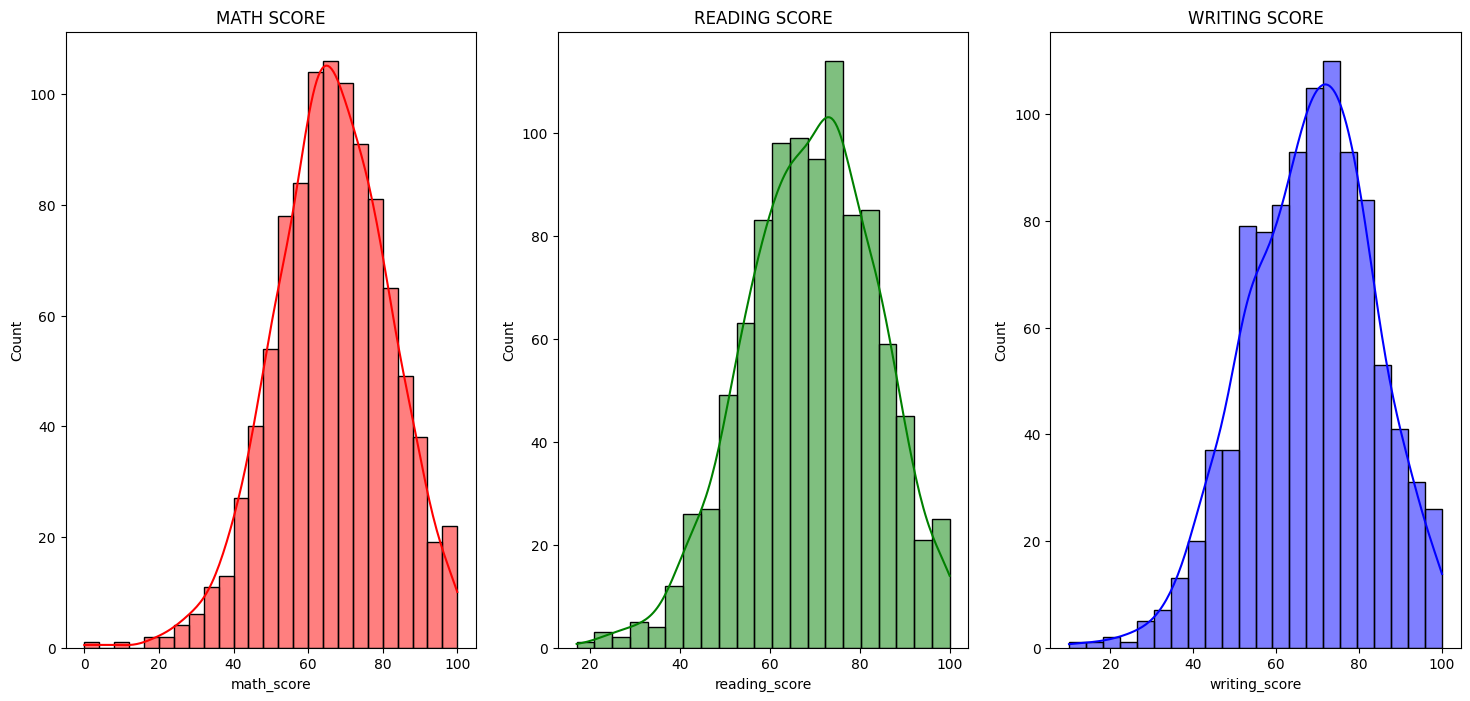

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title("MATH SCORE")
sns.histplot(x='math_score',data=df,color= 'red',kde = True)
plt.subplot(132)
plt.title("READING SCORE")
sns.histplot(x='reading_score',data=df,color= 'green',kde = True)
plt.subplot(133)
plt.title("WRITING SCORE")
sns.histplot(x='writing_score',data=df,color= 'blue',kde = True)
plt.show()

* From the above three plots its clearly visible that most of the students score in between 60-80 in Math whereas in reading and writing  most of them score from 50-80

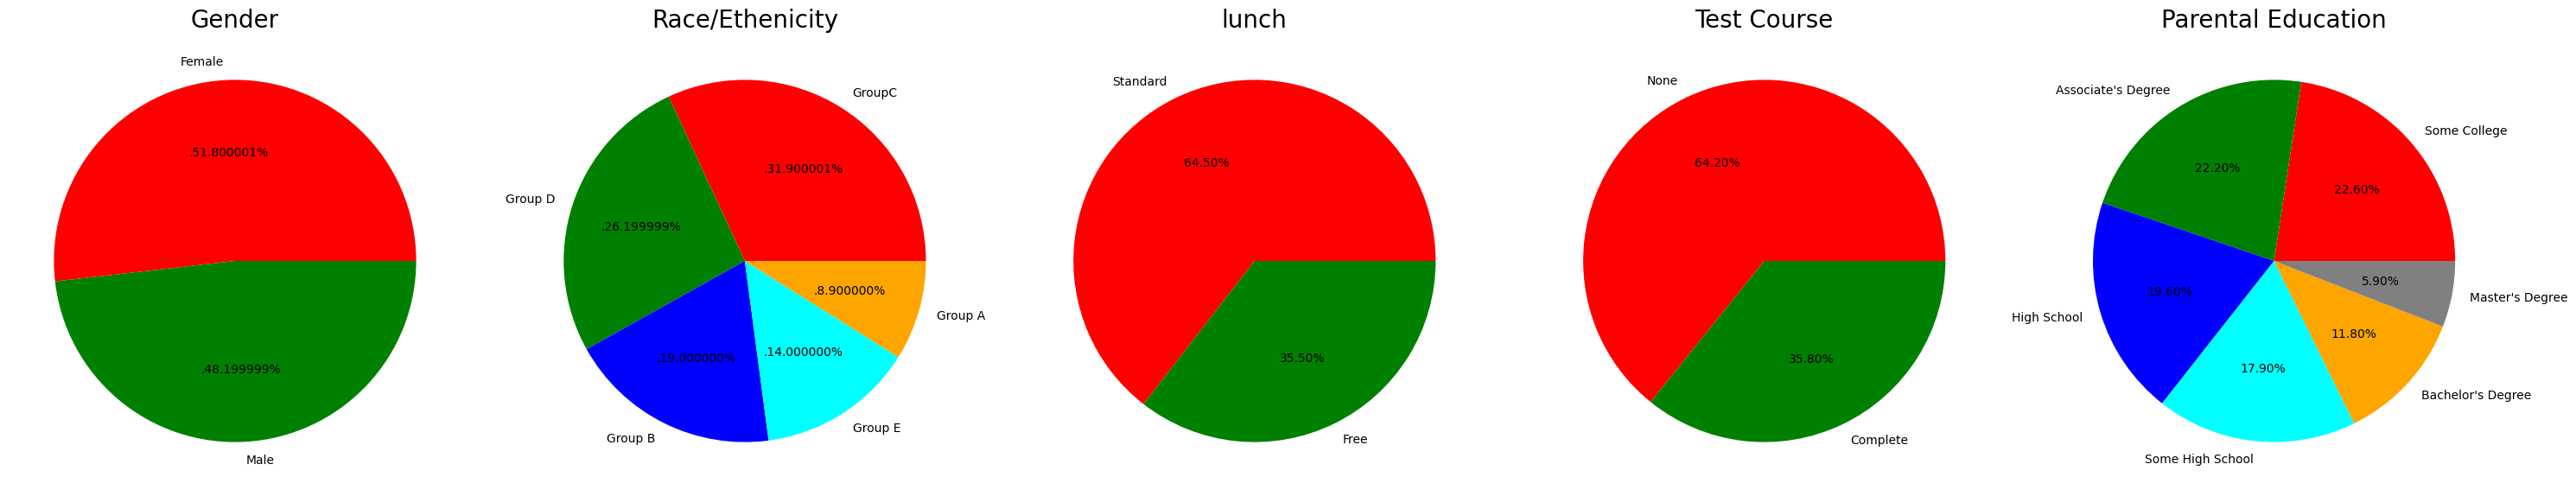

In [27]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = ['Female','Male']
color = ['red','green']

plt.pie(size,colors=color,labels = labels,autopct='.%2f%%')
plt.title('Gender',fontsize =20)
plt.axis('off')

plt.subplot(152)
size = df['race_ethnicity'].value_counts()
labels = 'GroupC','Group D','Group B','Group E','Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels = labels,autopct='.%2f%%')
plt.title('Race/Ethenicity',fontsize = 20)
plt.axis('off')

plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('lunch',fontsize = 20)
plt.axis('off')

plt.subplot(154)
size = df['test_preparation_course'].value_counts()
labels = 'None','Complete'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(155)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Parental Education',fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

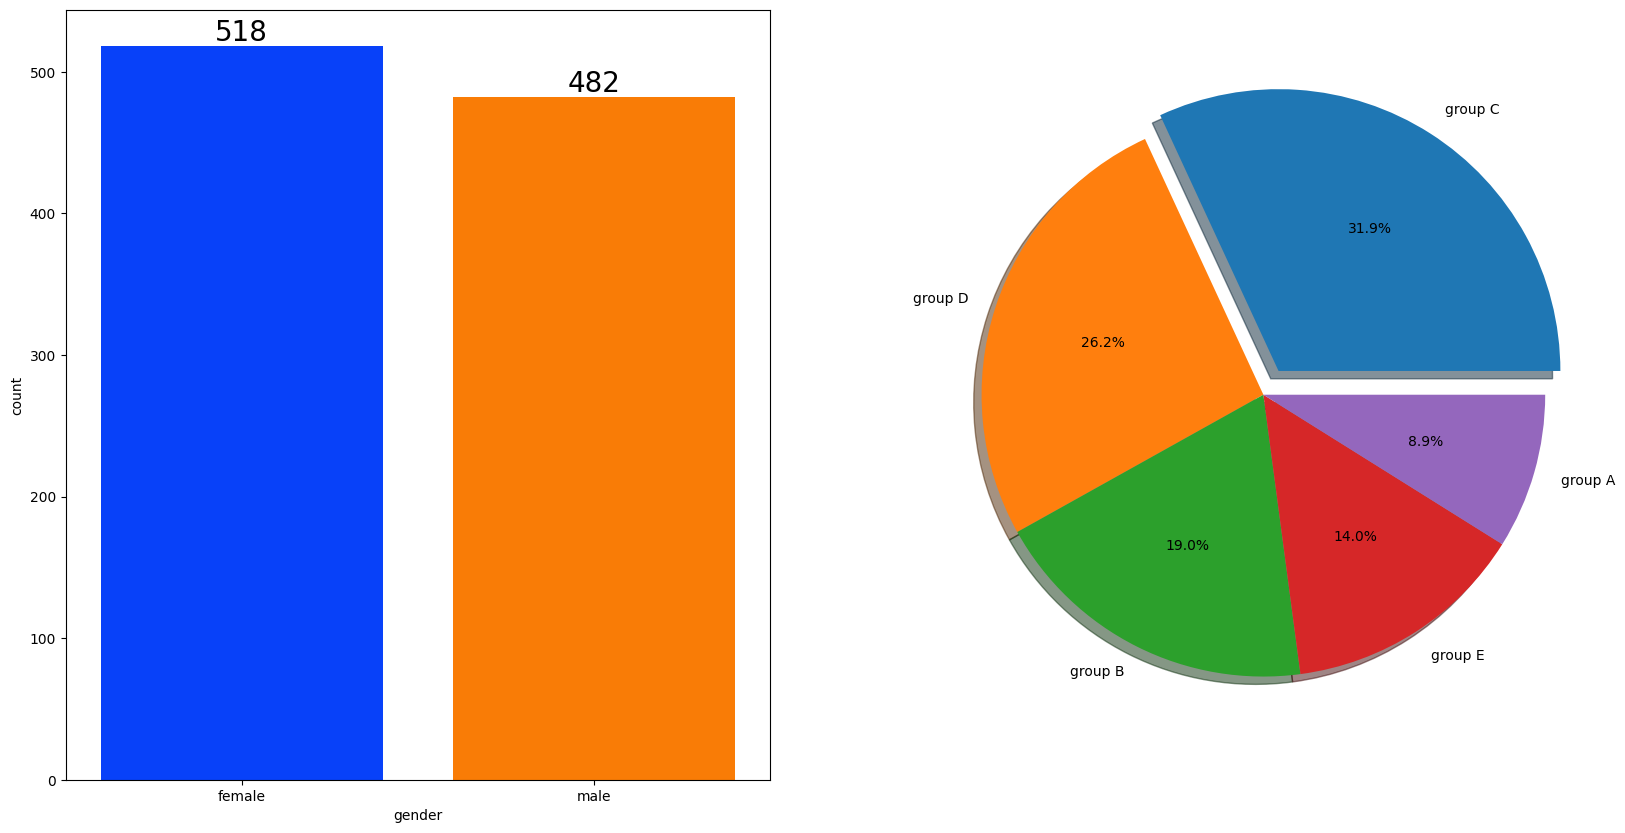

In [41]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data = df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

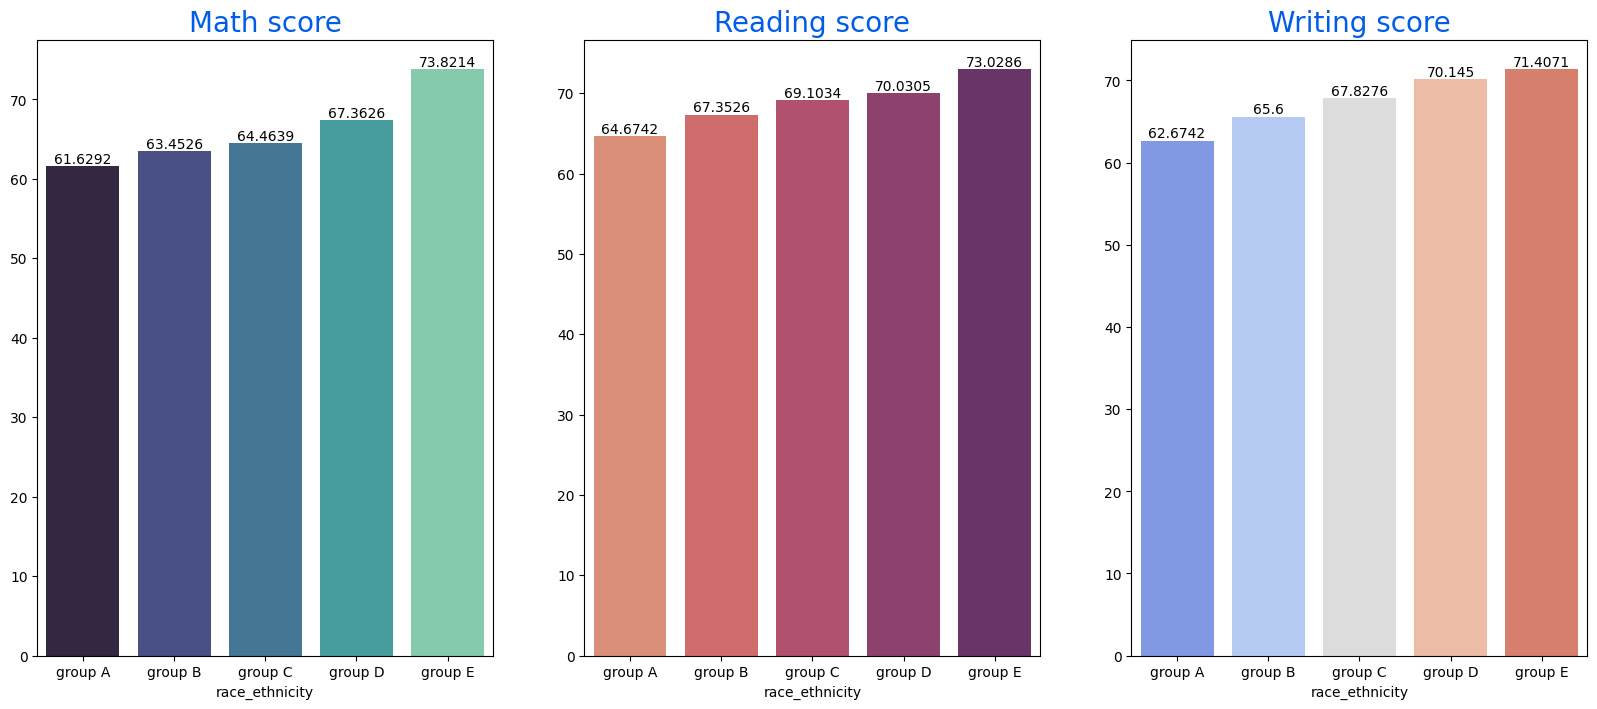

In [43]:
group_data = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3,figsize = (20,8))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for countainer in ax[0].containers:
    ax[0].bar_label(countainer,color='black',size = 10)
sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for countainer in ax[1].containers:
    ax[1].bar_label(countainer,color='black',size = 10)
sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for countainer in ax[2].containers:
    ax[2].bar_label(countainer,color='black',size = 10)


* Group E students have scored the highest marks
* Group A students have scored the lowest marks
* Students from a lower Socioeconomic status have a lower avg in all course subjects 

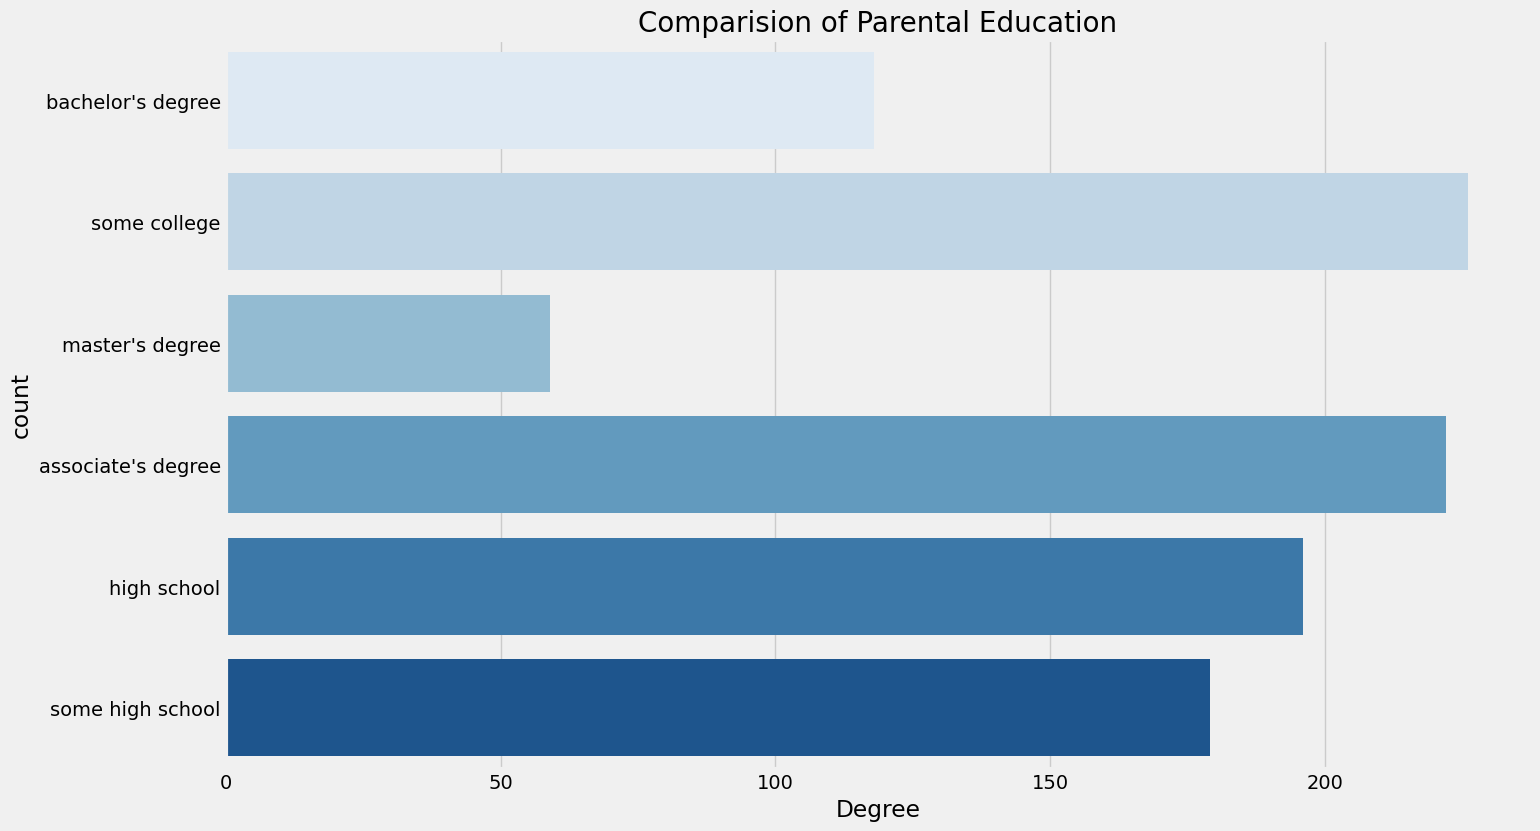

In [46]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparision of Parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

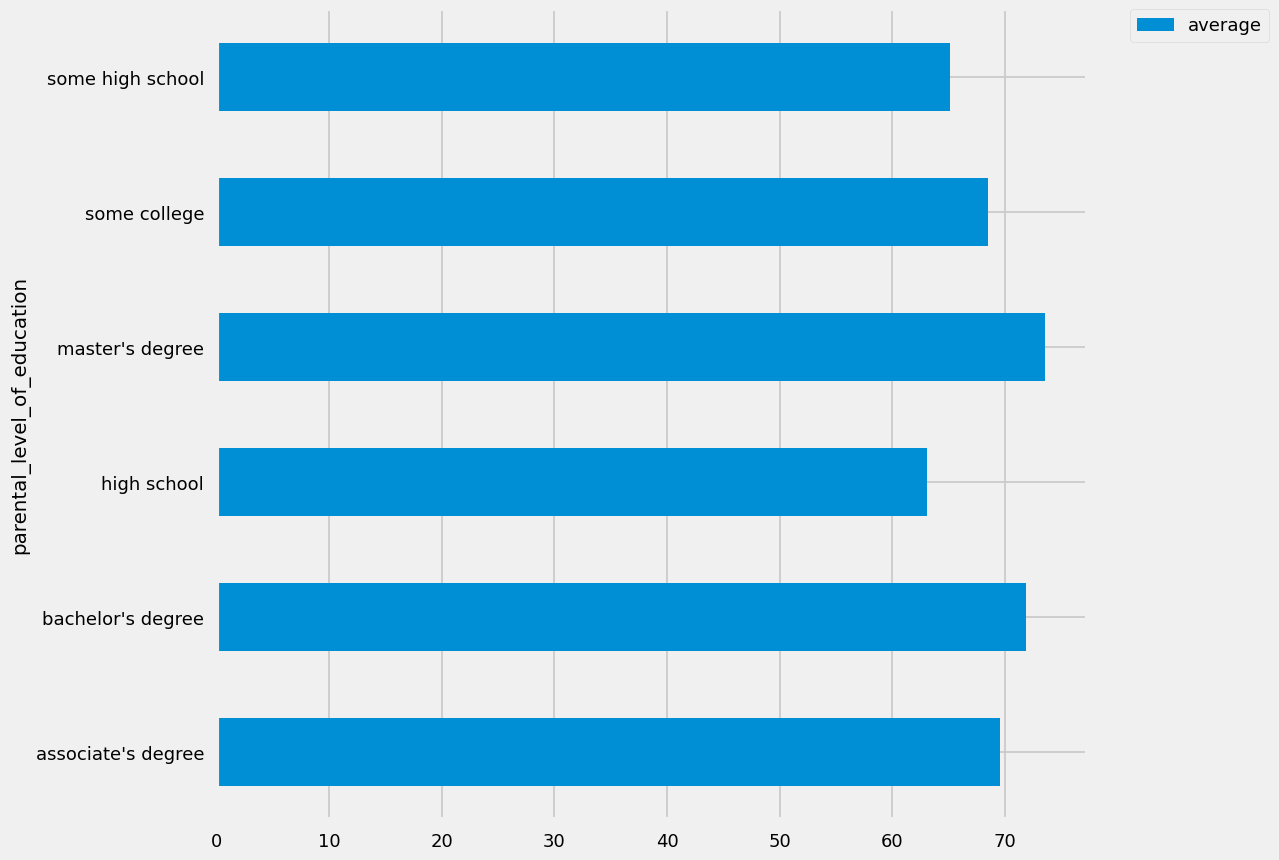

In [71]:
df.groupby('parental_level_of_education')['average'].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

In [62]:
df.groupby('parental_level_of_education')['average'].mean()

parental_level_of_education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: average, dtype: float64

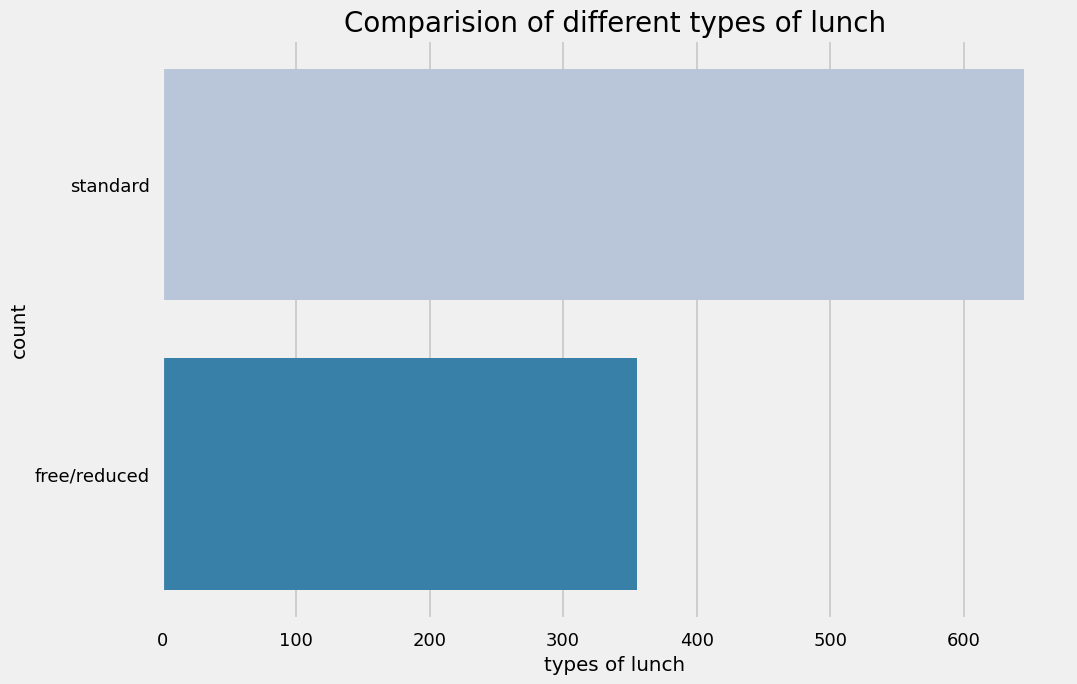

In [67]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparision of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

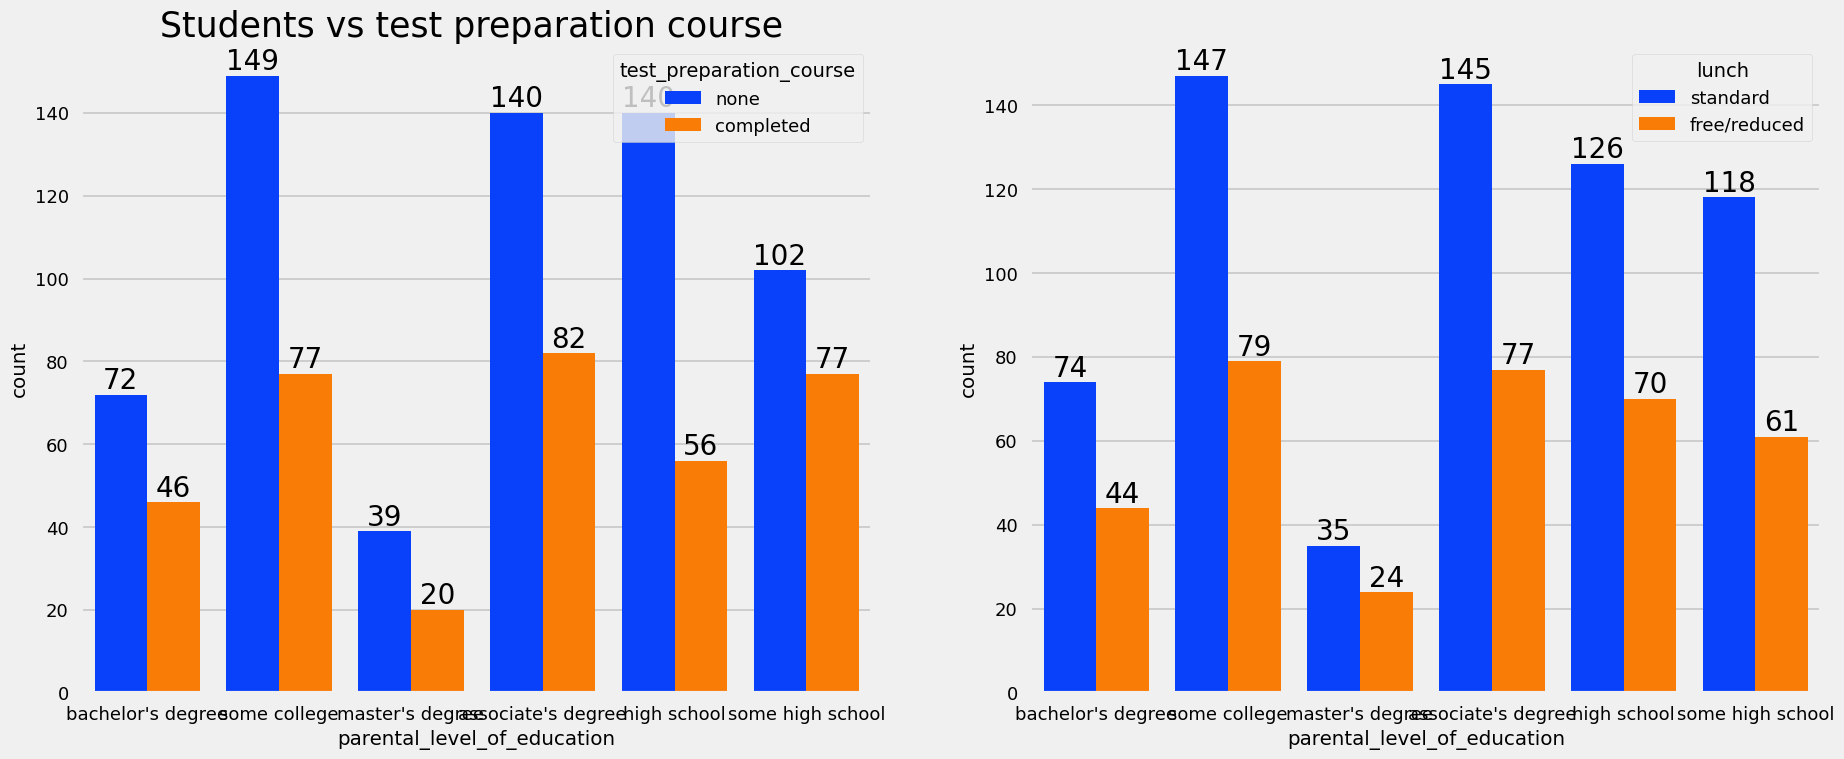

In [70]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

<Axes: xlabel='lunch', ylabel='writing_score'>

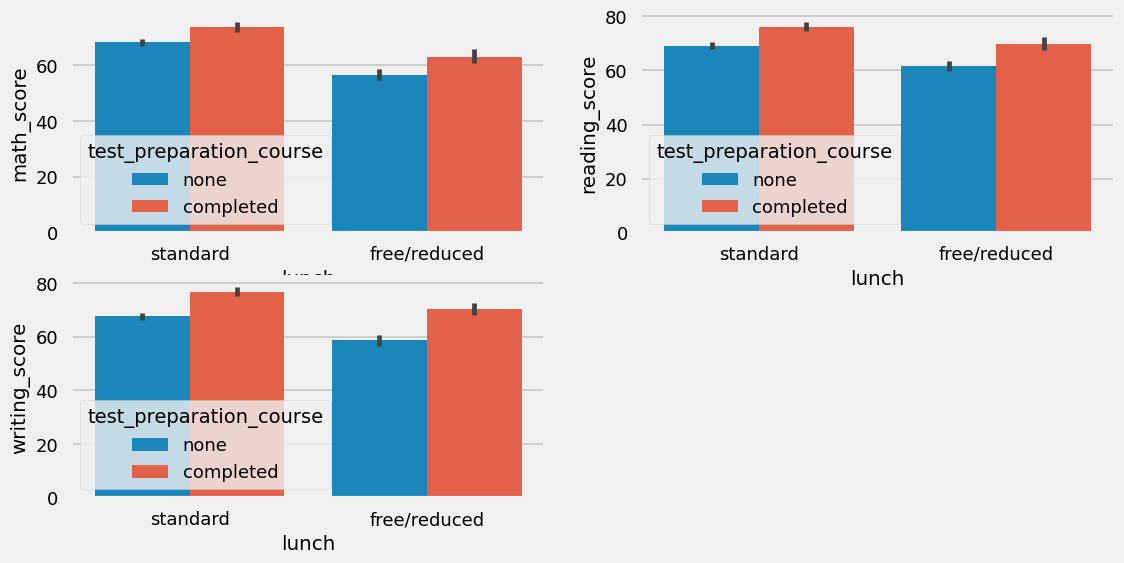

In [73]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

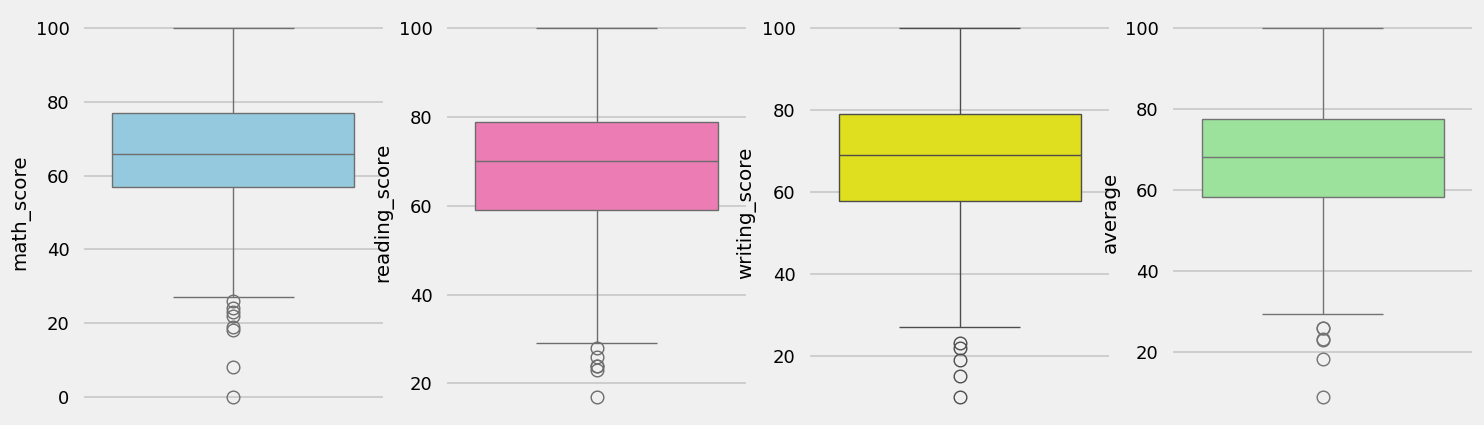

In [74]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

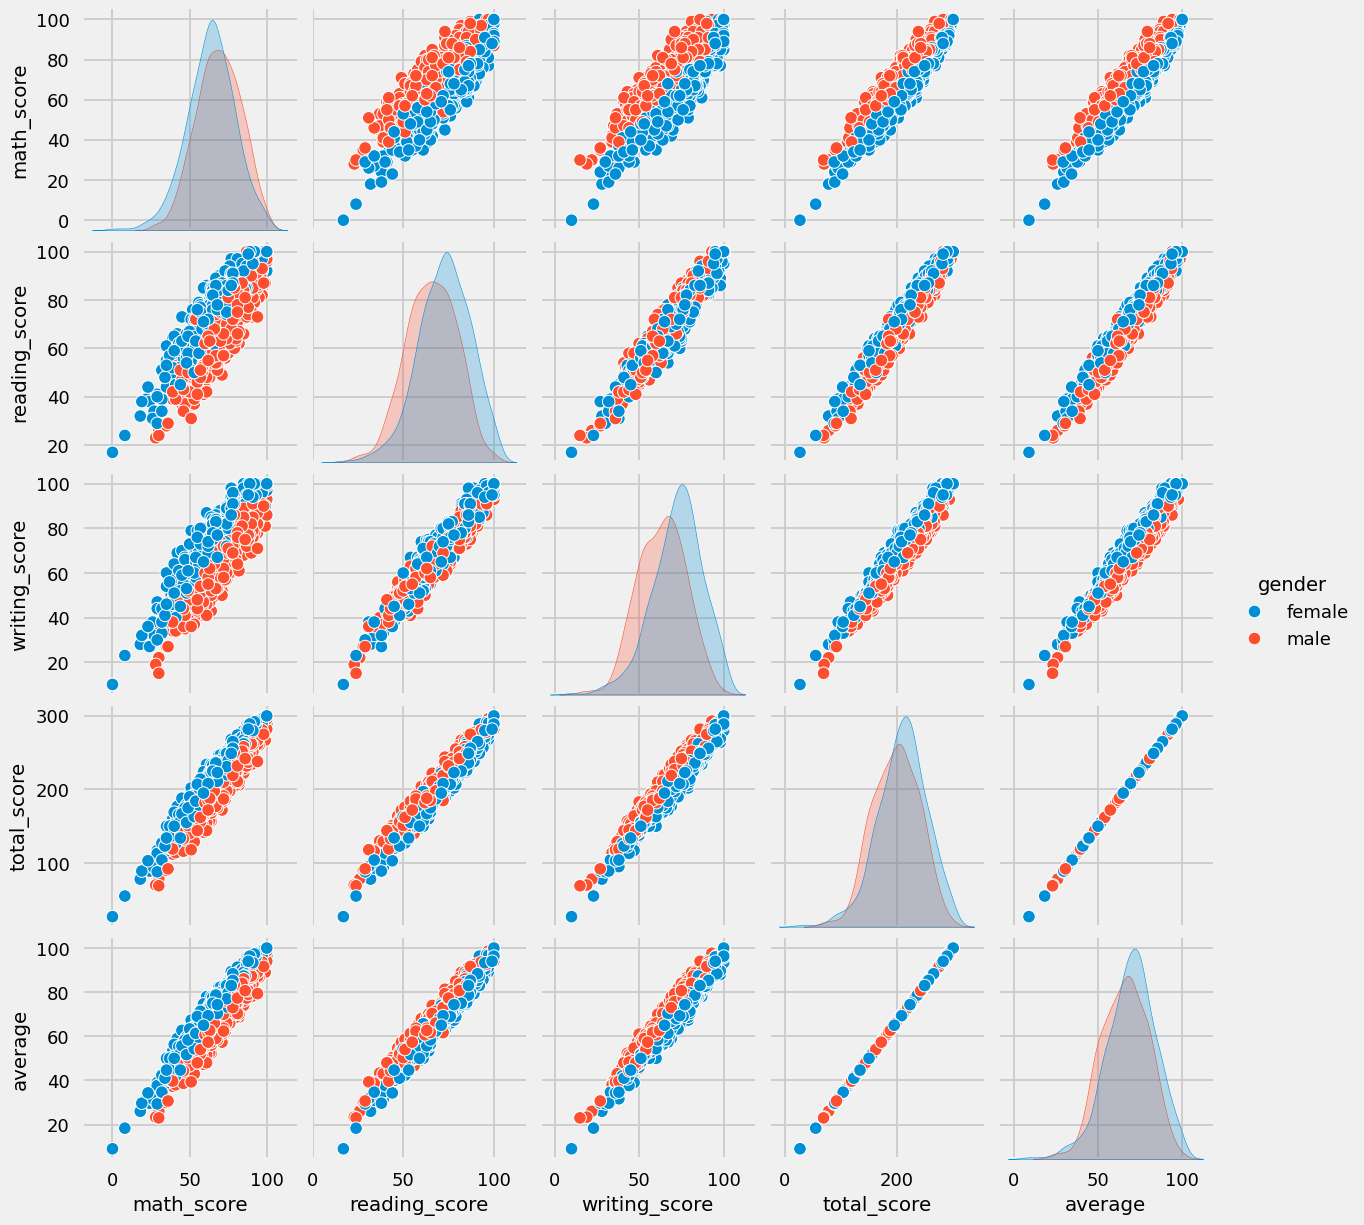

In [75]:
sns.pairplot(df,hue = 'gender')
plt.show()